![](https://torranceca.files.wordpress.com/2019/10/netflix.jpg)


# Netflix Movies & TV shows Analysis

As we all know NETFLIX is a subscription-based streaming service offering online streaming from a library of films and television series, including those produced in-house is a subscription-based streaming service offering online streaming from a library of films and television series, including those produced in-house

## Let's do Exploratory Data Analysis on NETFLIX trends.

## Importing Useful Libraries

To begin, first we will import some of the basic but strong python libraries.

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Loading Datasets
DataSource : [Kaggle](http://www.kaggle.com/shivamb/netflix-shows)

Now we are ready to load dataset from DataSource. We will check for the datafile in the directory and use read_csv() to have glimpse of data.

In [43]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
filename = os.path.join(dirname, filename)
df = pd.read_csv(filename)
df

/kaggle/input/netflix-shows/netflix_titles.csv


show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

After having glimpse of the dataset, noticeable points:
1. Columns having NaN/Null values.
2. Columns having comma separated values which may create difficulty on finding insights.
3. Data in columns not seems useful.

Let's dig down more

### Data Preparation and Cleaning



In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


There are total 12 columns and 7786 records in our dataframe.

We can also get columns and rows matrix of dataset by using shape

In [45]:
df.shape

(7787, 12)

### Handling NaN/Null values

It seems we have lot of unique values in our dataframe. Show_id having all unique values as it counts as unique key for the dataset.
type column having 2 count may be there are 2 tyoes of shows only in our dataset. lets check

In [46]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

We were right! There are only 2 types of shows in our dataframe.

In [47]:
df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

Yes we were right. We have 2 types of shows in our dataframe i.e Movies and TV shows

### Checking number of NaN/Null values in series

In [48]:
missing_values = df.isna().sum()
missing_values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Finding percentage of NaN/Null values in series

In [49]:
missing_percent = (missing_values.sort_values(ascending= False)/len(df))*100
missing_percent

director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
rating           0.089893
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

As we have 30% of data in director column and 9% in cast columns as Null. So let's not consider these columns in our analysis.

### Filling Nan/Null values with default values

To count null values as well. Let's assign some default value.

In [50]:
df.fillna('Unknown')

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            Unknown   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                            Unknown  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

NaN/Null values are now filled with 'Unknown' value.

In [51]:
df['title'][:20]

0         3%
1       7:19
2      23:59
3          9
4         21
5         46
6        122
7        187
8        706
9       1920
10      1922
11      1983
12      1994
13     2,215
14      3022
15    Oct-01
16    Feb-09
17    22-Jul
18    15-Aug
19       '89
Name: title, dtype: object

It seems that title column doesn't contain correct/valuable data. let's drop this column too from analysis.

As we have noticed there are comma separated values in few columns.

lets take an example of country. How could we get correct count of released shows per country if having comma separated values?

In [52]:
df['country'] = df['country'].str.split(',')
df_country = df.explode('country')
df_country

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   
7786           Sam Dunn                                                NaN   
7786           Sam Dunn                                                NaN   

             country          date_added  release_year rating   duration  \
0             Brazil     August 14, 2020          2020  TV-MA  4 Seasons   
1             Mexico   December 23, 2016          2016  TV-MA     93 min   
2          Singapore   December 20, 2018          2011      R     78 min   
3      United States   November 16, 2017          2009  PG-13     80 min   
4      United States     January 1, 2020          2008  PG-13    123 min   
...              ...                 ...           ...    ...        ...   
7784             NaN  September 25, 2020          2019  TV-MA     44 min   
7785       Australia    October 31, 2020          2019  TV-PG   1 Season   
7786  United Kingdom       March 1, 2020          2019  TV-MA     90 min   
7786          Canada       March 1, 2020          2019  TV-MA     90 min   
7786   United States       March 1, 2020          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   
7786                    Documentaries, Music & Musicals   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  
7786  This documentary delves into the mystique behi...  
7786  This docu

Now we have shows released per country. 

Suppose we have a show released/telecast in 3 countries then we should have 3 separate enteries to count releases per country.

New dataset having 9574 rows and 12 columns

As we did for country column, Same analysis we like to do on listed_in column.

In [53]:
df['listed_in'] = df['listed_in'].str.split(',')
df_listed_in = df.explode('listed_in')
df_listed_in

show_id     type                                    title  \
0         s1  TV Show                                       3%   
0         s1  TV Show                                       3%   
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
1         s2    Movie                                     7:19   
...      ...      ...                                      ...   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
...                 ...                                                ...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   
7786           Sam Dunn                                                NaN   

                                        country          date_added  \
0                                      [Brazil]     August 14, 2020   
0                                      [Brazil]     August 14, 2020   
0                                      [Brazil]     August 14, 2020   
1                                      [Mexico]   December 23, 2016   
1                                      [Mexico]   December 23, 2016   
...                                         ...                 ...   
7784                                        NaN  September 25, 2020   
7785                                [Australia]    October 31, 2020   
7785                                [Australia]    October 31, 2020   
7786  [United Kingdom,  Canada,  United States]       March 1, 2020   
7786  [United Kingdom,  Canada,  United States]       March 1, 2020   

      release_year rating   duration               listed_in  \
0             2020  TV-MA  4 Seasons  International TV Shows   
0             2020  TV-MA  4 Seasons               TV Dramas   
0             2020  TV-MA  4 Seasons     TV Sci-Fi & Fantasy   
1             2016  TV-MA     93 min                  Dramas   
1             2016  TV-MA     93 min    International Movies   
...            ...    ...        ...                     ...   
7784          2019  TV-MA     44 min        Music & Musicals   
7785          2019  TV-PG   1 Season  International TV Shows   
7785          2019  TV-PG   1 Season              Reality TV   
7786          2019  TV-MA     90 min           Documentaries   
7786          2019  TV-MA     90 min        Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
0     In a future where the elite inhabit an island ...  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
1     After a devastating earthquake hits Mexico Cit...  
...                                                 ...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  
7786  This docu

## EXPLORATORY DATA ANALYSIS AND VISUALIZATION

Let's do Data visulaization using some basic graphs.

In [54]:
df_country['country'] = df_country['country'].str.strip()
df1 = df_country.groupby(['country'])['show_id'].count().sort_values(ascending = False)
df1[:20]

country
United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          144
Egypt              110
Turkey             108
Hong Kong          102
Italy               90
Brazil              88
Belgium             85
Taiwan              85
Argentina           82
Name: show_id, dtype: int64

This gives us top 20 countries in which max number of shows releases.

- United States is on top and India is on second with release of 3297 and 990 shows respectively.

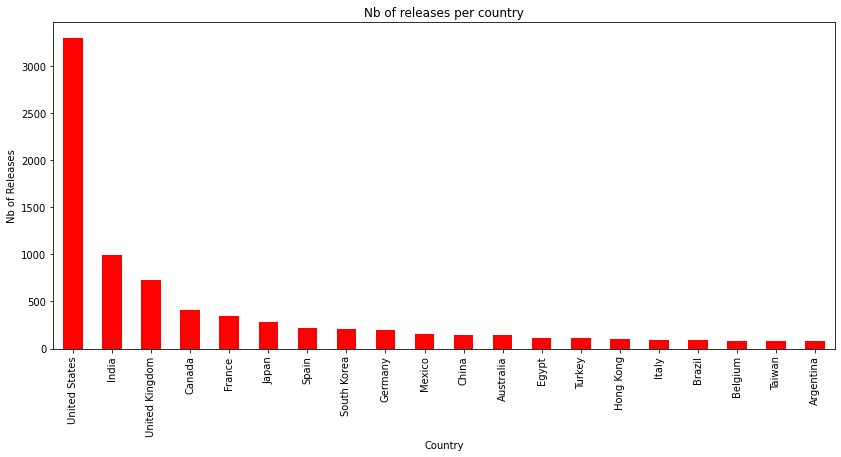

In [55]:
plt.figure(figsize=(14, 6))
df1[:20].plot(kind = 'bar', color='r')
plt.xlabel('Country')
plt.ylabel('Nb of Releases')
plt.title("Nb of releases per country")
plt.show()


Let's check which generes of shows releases the most.

In [56]:
df_listed_in[:50]

show_id     type                 title              director  \
0       s1  TV Show                    3%                   NaN   
0       s1  TV Show                    3%                   NaN   
0       s1  TV Show                    3%                   NaN   
1       s2    Movie                  7:19     Jorge Michel Grau   
1       s2    Movie                  7:19     Jorge Michel Grau   
2       s3    Movie                 23:59          Gilbert Chan   
2       s3    Movie                 23:59          Gilbert Chan   
3       s4    Movie                     9           Shane Acker   
3       s4    Movie                     9           Shane Acker   
3       s4    Movie                     9           Shane Acker   
4       s5    Movie                    21        Robert Luketic   
5       s6  TV Show                    46           Serdar Akar   
5       s6  TV Show                    46           Serdar Akar   
5       s6  TV Show                    46           Serdar Akar   
6       s7    Movie                   122       Yasir Al Yasiri   
6       s7    Movie                   122       Yasir Al Yasiri   
7       s8    Movie                   187        Kevin Reynolds   
8       s9    Movie                   706         Shravan Kumar   
8       s9    Movie                   706         Shravan Kumar   
9      s10    Movie                  1920          Vikram Bhatt   
9      s10    Movie                  1920          Vikram Bhatt   
9      s10    Movie                  1920          Vikram Bhatt   
10     s11    Movie                  1922          Zak Hilditch   
10     s11    Movie                  1922          Zak Hilditch   
11     s12  TV Show                  1983                   NaN   
11     s12  TV Show                  1983                   NaN   
11     s12  TV Show                  1983                   NaN   
12     s13  TV Show                  1994  Diego Enrique Osorno   
12     s13  TV Show                  1994  Diego Enrique Osorno   
12     s13  TV Show                  1994  Diego Enrique Osorno   
13     s14    Movie                 2,215   Nottapon Boonprakob   
13     s14    Movie                 2,215   Nottapon Boonprakob   
13     s14    Movie                 2,215   Nottapon Boonprakob   
14     s15    Movie                  3022            John Suits   
14     s15    Movie                  3022            John Suits   
14     s15    Movie                  3022            John Suits   
15     s16    Movie                Oct-01        Kunle Afolayan   
15     s16    Movie                Oct-01        Kunle Afolayan   
15     s16    Movie                Oct-01        Kunle Afolayan   
16     s17  TV Show                Feb-09                   NaN   
16     s17  TV Show                Feb-09                   NaN   
17     s18    Movie                22-Jul       Paul Greengrass   
17     s18    Movie                22-Jul       Paul Greengrass   
18     s19    Movie                15-Aug    Swapnaneel Jayakar   
18     s19    Movie                15-Aug    Swapnaneel Jayakar   
18     s19    Movie                15-Aug    Swapnaneel Jayakar   
19     s20    Movie                   '89                   NaN   
20     s21    Movie  ​​Kuch Bheege Alfaaz                  Onir   
20     s21    Movie  ​​Kuch Bheege Alfaaz                  Onir   
20     s21    Movie  ​​Kuch Bheege Alfaaz                  Onir   

                                                 cast  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...   
0   João Miguel, Bianca Comparato, Michel Gomes, R...   
0   João Miguel, Bianca Comparato, Michel Gomes, R...   
1   Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
1   Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2   Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
2   Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3   Elijah Wood, John C. Reilly, Jennifer Connelly...   
3   Elijah Wood, John C. Reilly, Jennifer Connelly...   
3   Elijah Wood

In [57]:
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.strip()
df2 = df_listed_in['listed_in'].value_counts().sort_values(ascending = False).head(20)
df_listed_sort = df2.sort_values()
df_listed_sort

British TV Shows             232
Horror Movies                312
Music & Musicals             321
Stand-Up Comedy              329
Romantic TV Shows            333
Docuseries                   353
Kids' TV                     414
Crime TV Shows               427
Thrillers                    491
TV Comedies                  525
Romantic Movies              531
Children & Family Movies     532
Independent Movies           673
TV Dramas                    704
Action & Adventure           721
Documentaries                786
International TV Shows      1199
Comedies                    1471
Dramas                      2106
International Movies        2437
Name: listed_in, dtype: int64

This gives us in which genre maximum shows releases.

- It seems maximum shows releases in 'Internationa Movies' then comes 'Dramas'.

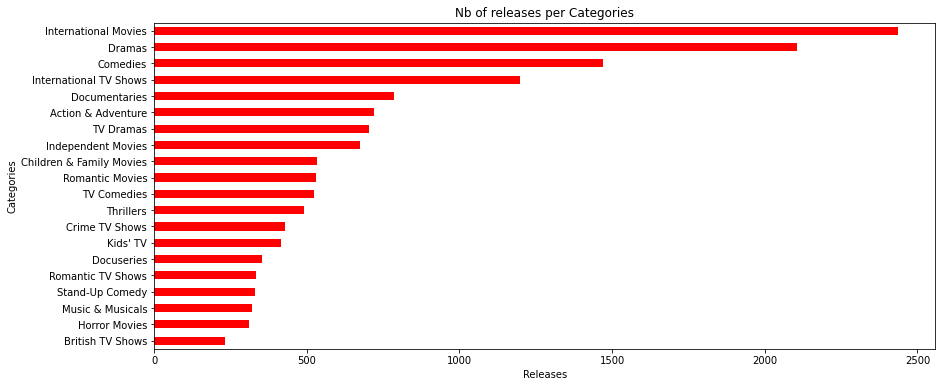

In [58]:
plt.figure(figsize=(14, 6))
df_listed_sort.plot(kind = 'barh', color='r')
plt.xlabel('Releases')
plt.ylabel('Categories')
plt.title("Nb of releases per Categories")
plt.show()


### Ratings

In [59]:
df.rating.value_counts().sort_values(ascending=False)

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Now let's dive into rating and find out maximum content on Netflix are for which audience ;)

In [60]:
def name_(row):
    if row == 'TV-MA':
        row = 'TV-MA - Mature Audience Only'
    elif row == 'G':
        row = 'G – General Audiences'
    elif row == 'TV-PG':
        row = 'TV-PG – Parental Guidance Suggested'
    elif row == 'PG':
        row = 'PG – Parental Guidance Suggested'
    elif row == 'PG-13':
        row = 'PG-13 – Parents Strongly Cautioned'
    elif row == 'R':
        row = 'R – Restricted'
    elif row == 'NC-17':
        row = 'NC-17 – No children under 17'
    elif row == 'TV-Y':
        row = 'TV-Y - All Children'
    elif row == 'TV-Y7':
        row = 'TV-Y7-FV - Directed to Older Children above 7'
    elif row == 'TV-Y7-FV':
        row = 'TV-Y7 FV: Directed to Older Children - Fantasy Violence'
    elif row == 'TV-14':
        row = 'TV-14 - Parents Strongly Cautioned'
    elif row == 'TV-G':
        row = 'TV-G: General Audience'
    elif row == 'UR' or 'NR':
        row = 'UR - Unrated'
    else:
        row = row
    return row
df['rating']=df['rating'].apply(name_)

df_rating = df['rating'].value_counts().sort_values(ascending=True)
df_rating

NC-17 – No children under 17                                  3
TV-Y7 FV: Directed to Older Children - Fantasy Violence       6
G – General Audiences                                        39
UR - Unrated                                                 96
TV-G: General Audience                                      194
PG – Parental Guidance Suggested                            247
TV-Y7-FV - Directed to Older Children above 7               271
TV-Y - All Children                                         280
PG-13 – Parents Strongly Cautioned                          386
R – Restricted                                              665
TV-PG – Parental Guidance Suggested                         806
TV-14 - Parents Strongly Cautioned                         1931
TV-MA - Mature Audience Only                               2863
Name: rating, dtype: int64

So interesting thing we have got

- Maximum content on netflix are for only 'Mature Audience'.

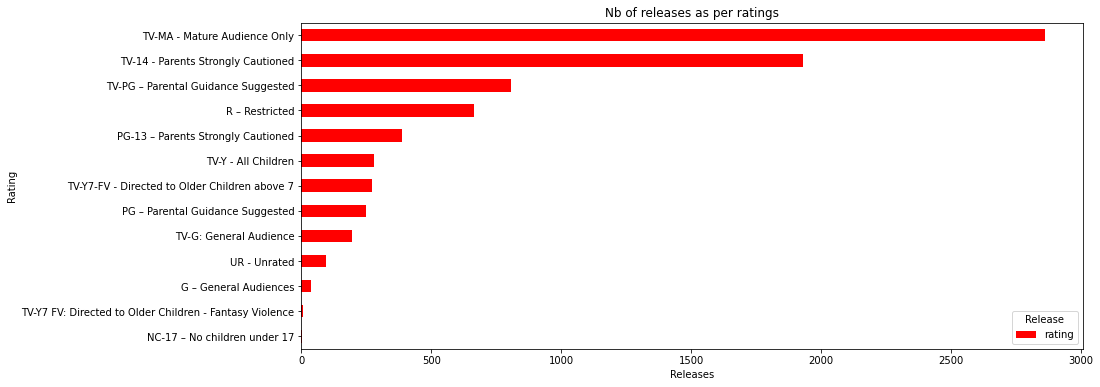

In [61]:
plt.figure(figsize=(14, 6))
df_rating.plot(kind = 'barh', color='r')
plt.xlabel('Releases')
plt.ylabel('Rating')
plt.legend(title = "Release",loc="lower right", fontsize = 10)
plt.title("Nb of releases as per ratings")
plt.show()


I'm also thinking about the impact of pandemic on Netflix.
Let's check number of shows releases on Netflix in last few years specially 2020 and 2021.

In [62]:
df_release_year = df['release_year'].value_counts().sort_index(ascending=False).head(20)
df_release_year.head(20)


2021      31
2020     868
2019     996
2018    1121
2017    1012
2016     882
2015     541
2014     334
2013     267
2012     219
2011     166
2010     173
2009     137
2008     125
2007      85
2006      85
2005      73
2004      59
2003      49
2002      45
Name: release_year, dtype: int64

Here we get...from last 20 years content creation was increasing year by year on Netflix till 2018. Then it goes down.
so yes may be impact of covid on Netflix as well

- Maximum released content was in 2018 with 1121 shows.
- Its 996 in 2019.
- Its 868 in 2020.


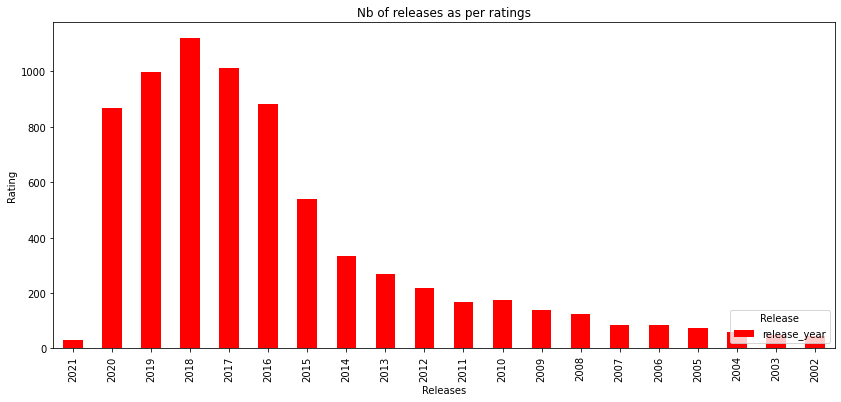

In [63]:
plt.figure(figsize=(14, 6))
#df_release_year.plot(kind = 'bar', color='r')
df_release_year.plot(kind = 'bar', color = 'r')
plt.xlabel('Releases')
plt.ylabel('Rating')
plt.legend(title = "Release",loc="lower right", fontsize = 10)
plt.title("Nb of releases as per ratings")
plt.show()


Here I have used a different way to get shows release per year using df_country dataframe.

In [64]:
df_country.drop_duplicates(subset=['show_id'])['release_year'].value_counts().sort_index(ascending = False)

2021      31
2020     868
2019     996
2018    1121
2017    1012
        ... 
1945       3
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 73, dtype: int64

Initially we have checked type of shows on Netflix. So before ending it lets check percent of movies and TV shows.

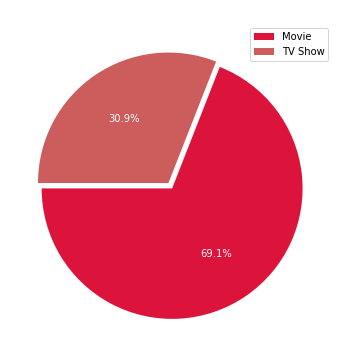

In [65]:
plt.figure(figsize=(14, 6))
plt.title("% of Netflix Titles that are either Movies or TV Shows",color = 'w')
g = plt.pie(df.type.value_counts(), explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['Crimson','IndianRed'],autopct='%1.1f%%', startangle=180,textprops={'color':"w"});
plt.legend()
plt.show()

69% shows on Netlix are 'Movies'.

31% shows are 'TV shows'

## Ask and Answer questions

1. Top 5 countries with most releases?
2. Top 5 genres with most relased shows?
3. Rating under which most shows releases?
4. Which Year having most shows released since last 20 years?
5. Types of shows with number of releases?


    

## Summary & Conclusions

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion. Even most of the viewers of Netflix are Mature Audience which results in maximun release of shows under rating MA. It also impacted by Covid as per the trend of last 20 year, content was increasing year by year till 2018.